#  Data Analysis on Google Apps Rating Kaggle's Dataset 

# Information about dataset


    Dataset is taken from kaggle
    It consists of 13 columns/features/attributes namely-

    1.App- consists of name of the app    - Datatype- string
    2.Category - consists of the category that the app belongs to - Datatype- string
    3.Rating - consists of user rating - Datatype- float
    4.Reviews - consists of total no. of user reviews - Datatype- digit
    5.Size - its memory size - Datatype- string
    6.Installs - consists of total no. of installations- Datatype- string
    7.Type- consists of whether the app is free or paid - Datatype- string
    8.Price - Price of the app - 0 if free else dollar x where x is the amount - Datatype- string(since price starts with dollar)
    9.Content rating - tells for whom is the content for - Datatype- string
    10.Genres- the genre of the app - Datatype- string
    11.Last updated - tells when was the app last updated - Datatype- string
    12.current ver -tells the current version of the app - Datatype- string
    13.Android ver- tells which android version the app supports - Datatype- string
    
    It consists of around 10k rows

In [1]:
#Jupyter notebook-it is kernel type of an ide which lets user write code and produce result.It saves your code every moment in a notebook format.
#ipynb extension- interactive python notebook

In [79]:
import pandas as pd #for playing with the data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
google_data=pd.read_csv('googleplaystore.csv')
#type(google_data)# to see the datatype of the variable
google_data.head() #gives you top 5 rows by default
#google_data.head(20)#gives you top 20 rows 
#google_data.tail(20)#gives you last 20 rows 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [81]:
google_data.shape # shape is an attribute of dataframe which gives total no. of rows and columns in our dataframe

(10841, 13)

In [82]:
google_data.describe() #gives the summary statistics of the data frame 
#25%,50%,75% in output is interquartile ranges
#rating is the only numerical column , other columns are categorical

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Checking for Outlier

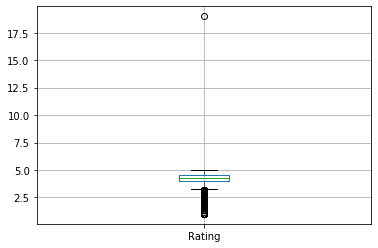

In [83]:
google_data.boxplot() # to detect the outlier basically

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA5E6E09C8>]],
      dtype=object)

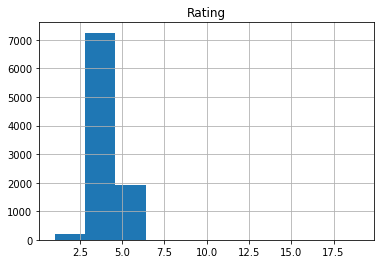

In [84]:
google_data.hist()

In [85]:
google_data.info() # to see the info about the column, to get the no. of non-null and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data cleaning

Count the number of missing values in the dataframe

In [86]:
google_data.isnull() #return true/ false for each item in dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
#count the number of missing values in each column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# check how many ratings are more than 5 - i.e. how many outliers are there

In [88]:
google_data[google_data.Rating>5] #get me all the value from Rating column where rating is > 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Only one outlier with rating 19

In [89]:
#remove the outlier
google_data.drop([10472],inplace=True) #passed the index of the outlier row to drop it, made the changes inplace i.e in the dataset itself that is stored in the notebook

In [90]:
#checking whether the row no. 10472 is dropped or not
google_data[10470:10475] #view rows from 10470 to 10475

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


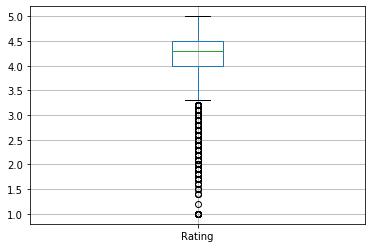

In [91]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA5E7162C8>]],
      dtype=object)

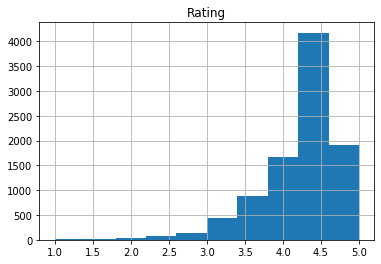

In [92]:
google_data.hist() 

So, we see that the graph is right skewed, so we fill the missing values by median. Median is favourable over mean in case of right skewed data 

# Remove columns that are 90% empty

In [93]:
threshold=len(google_data)*0.1 #taking 10% of rows(here rows=10840)
threshold
#we want to drop column which is 90% empty

1084.0

In [94]:
 google_data.dropna(thresh=threshold,axis=1,inplace=True) #axis=0 for rows(by default), 1 for column
#we re dropping column with only 10% rows filled

In [95]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [96]:
google_data.shape

(10840, 13)

we see that none of our column is dropped as in our dataset everycolumn is 90% filled

# Data Imputation and Manipulation

 Fill the null values with appropriate values using aggregate functions such as mean, median or mode
 
 For categorical values,I am going to use mode
 
 For numerical values , I am going to use median since our dataset is right skewed

In [97]:
#defining a function impute median
def impute_median(series): # passing a series i.e. a column
    return series.fillna(series.median()) #fill blank values by median

In [98]:
google_data.Rating=google_data['Rating'].transform(impute_median) #passing each value of rating to our function and tranforming it 

In [99]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Rating column has zero null values now, so all null values in this column has been filled by median

In [100]:
#removing null values from our columns with categorical data
#filling the null values by mode
#checking the mode values for these columns
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [101]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True) #since mode can return unimodal or bimodal value, so we are doing values[0] to take the first value if it is bimodal
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [102]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [103]:
#Converting Price ,Reviews and ratings into numerical values to perform data analysis on them
google_data['Price']=google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
google_data['Price']=google_data['Price'].apply(lambda x:float(x))
google_data['Reviews']=pd.to_numeric(google_data['Reviews'],errors='coerce')#coerce - says ignore the errors

In [104]:
google_data['Installs']=google_data['Installs'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
google_data['Installs']=google_data['Installs'].apply(lambda x:str(x).replace(',','')if ',' in str(x) else str(x))
google_data['Installs']=google_data['Installs'].apply(lambda x:float(x))

In [105]:
google_data.head() #checking if the changes are made

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [106]:
google_data.describe() #summary statistics after cleaning 
#describing the numeric columns
#earlier we had only rating column as numeric now we have reviews,installs and price added

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data Visualisation

In [107]:
grp=google_data.groupby('Category') #grouping the data on the basis of category
x=grp['Rating'].agg(np.mean) #grouping the items of a category type and finding the mean of Rating column of item belonging to that category
#doing this for all the categories
y=grp['Price'].agg(np.sum)#finding sum here as I'm more interested to know how mauch money do an app earns a category wise
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)
#agg- performing aggregation

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

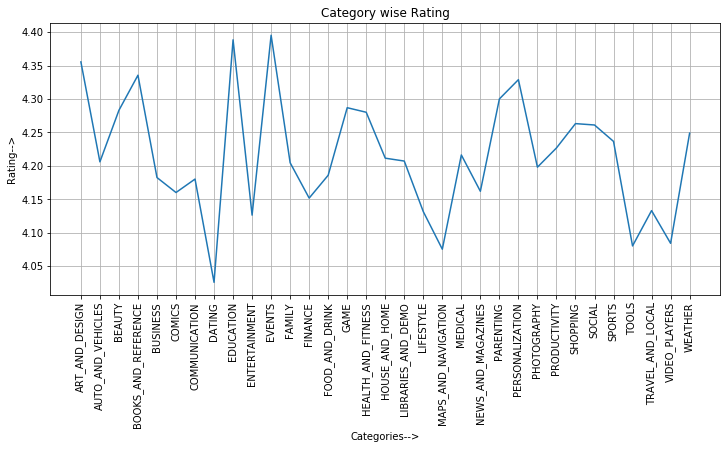

In [108]:
#plt.rcParams['figure.figsize']=17,8 #to increase the size of figure
plt.figure(figsize=[12,5]) #figsize is an attribute where we set length and height of the figure
plt.plot(x)#category wise rating  # gives a line chart
#plt.plot(x,'ro') #gives bubble chart
#since x axis label is clumsy
plt.xticks(rotation=90) #rotated the labels and made it vertical
plt.grid(True)#to add grid pattern
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

# Inference: Events and the Education apps are most rated and liked by people

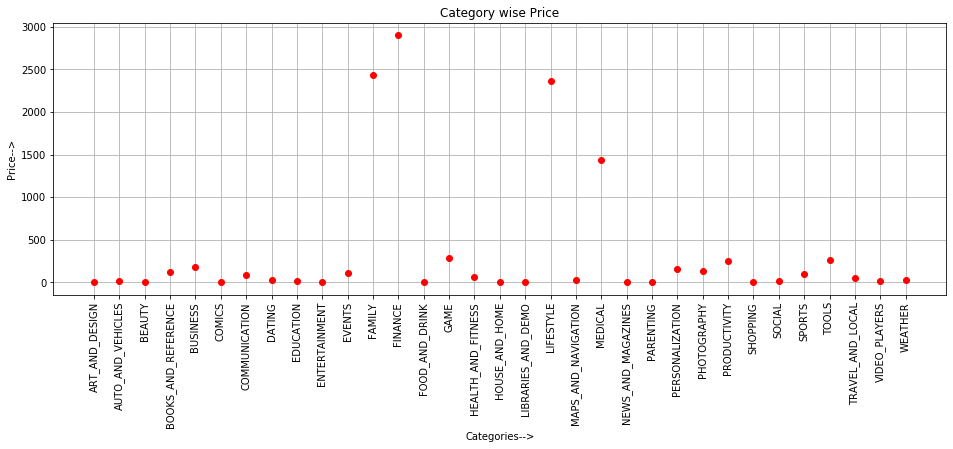

In [109]:
plt.figure(figsize=[16,5])
#plt.plot(y,'ro',color='b') # ro:bubbles, color='b' sets bubble color to blue which is red by default, g for green
plt.plot(y,'ro') 
plt.xticks(rotation=90)
plt.grid(True)#to add grid pattern
plt.title('Category wise Price')
plt.xlabel('Categories-->')
plt.ylabel('Price-->')
plt.show()

# Inference:Apps that people are mostly buying- Finance, Family,lifestyle and medical

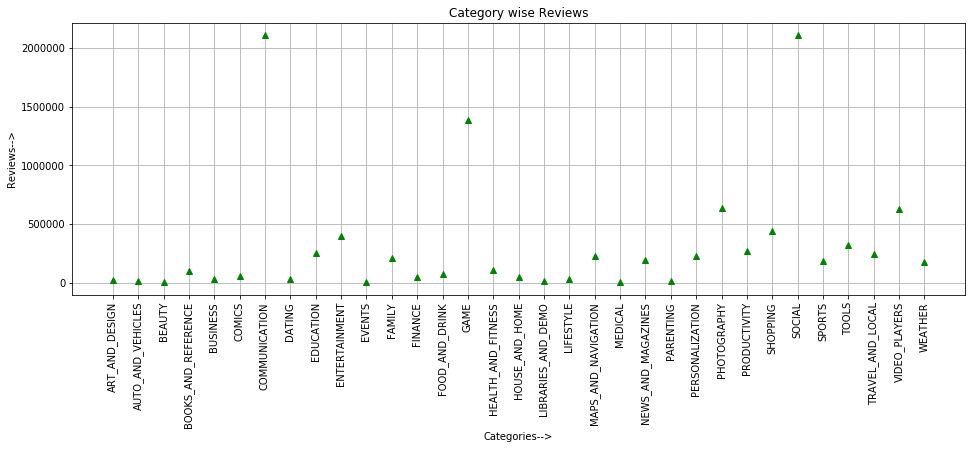

In [110]:
import mplcursors as mpc
plt.figure(figsize=[16,5])
#plt.plot(z,'ro',color='b') # ro:bubbles(graph type), color='b' sets graph color to blue which is red by default, g for green
#plt.plot(z,'r--',color='b')#r-- for dashed line(graph type)
plt.plot(z,'g^',color='g')#bs: for square shaped markers, g^:for triangle shaped
plt.grid(True)#to add grid pattern
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

# Inference: Apps with more reviews- Communication ,social and game category apps

In [111]:
freeApps = len(google_data[google_data['Type'] == 'Free'])
print("No. of free apps = ", freeApps)

No. of free apps =  10040


In [112]:
paidApps = len(google_data) - freeApps
print("No. of paid apps = ", paidApps)

No. of paid apps =  800


In [113]:
google_data.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,4.3,6,2.5M,50.0,Free,0.0,Everyone,Entertainment,"May 29, 2018",1,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,4.3,0,3.1M,10.0,Free,0.0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,4.3,1,2.9M,100.0,Free,0.0,Everyone,Video Players & Editors,"April 22, 2018",1,4.0.3 and up
10824,Cardio-FR,MEDICAL,4.3,67,82M,10000.0,Free,0.0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,4.3,7,7.7M,100.0,Free,0.0,Teen,Social,"February 2, 2018",1,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000.0,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000.0,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,10000.0,Free,0.0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,10000.0,Free,0.0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,100000.0,Free,0.0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [114]:
google_data.sort_values(by='Reviews', ascending=False)[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


# App with most reviews- Facebook

In [117]:
#convert app size from string to float, converted size to MB
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
google_data['Size'] = google_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


google_data['Size'] = google_data['Size'].apply(lambda x: float(x))

In [118]:
google_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [119]:
google_data.drop_duplicates(subset='App', inplace=True) #dropping duplicate app names

In [120]:
google_data.shape

(9659, 13)

In [122]:
google_data.sort_values(by='Reviews', ascending=False)[:3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


# Top 3 most reviewed apps-

   1.Facebook
   2.Whatsapp
   3.Instagram

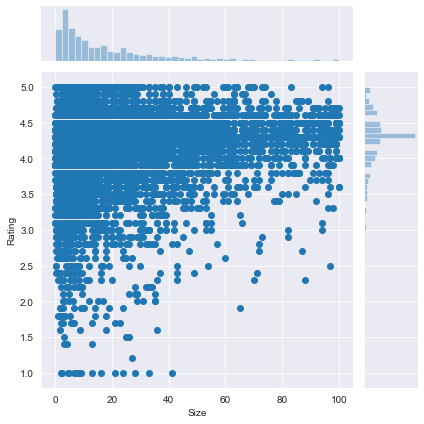

In [129]:
groups = google_data.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

sns.set_style("darkgrid")
ax = sns.jointplot(google_data['Size'], google_data['Rating'])

# Inference :
    Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy

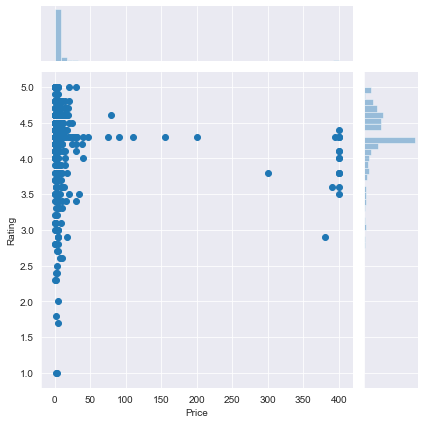

In [130]:
paid_apps = google_data[google_data.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

# Inference: 
    Paid Apps are priced ~2 to ~30$

# CONCLUSION:
        1.Avg. Rating of the app: 4.2
        2.Events and the Education apps are most rated and liked by people
        3.Apps that people are mostly buying- Finance, Family,lifestyle and medical
        4.Apps with more reviews- Communication ,social and game category apps
        5.Top 3 most reviewed apps-1.Facebook 2.Whatsapp 3.Instagram
        6.People prefer neither too light nor too heavy apps
        7.People prefer optimally priced apps.
        8.Playstore has a less no. of paid apps as compared to free apps which are active
        
